In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
PATH = 'images/boxes'
INPUT_SIZE = (100,100, 3)

In [3]:
with open("categories.txt", "r") as file:
    categories = file.read().splitlines()
    
num_classes = len(categories)

In [4]:
dataset = []
X = []
y = []

i = 0
for folder in categories:
    files = os.listdir(f'{PATH}/{categories[i]}')
    for file in files:
        img = cv.imread(f'{PATH}/{categories[i]}/{file}')
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, INPUT_SIZE[:2])
        dataset.append([img, i])
    i += 1

In [5]:
for images, labels in dataset:
    X.append(images)
    y.append(labels)

In [6]:
X = np.array(X).reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
X = X / 255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [16]:
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)

In [ ]:
flow_from_directory(
    directory, target_size=(256, 256), color_mode='rgb', classes=None,
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest'
)

In [27]:
epochs = 10
lr = 15e-4
batch_size = 1

print(batch_size)

input = tf.keras.layers.Input(INPUT_SIZE)

conv_1 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(input)
pool_1 = MaxPool2D(pool_size=(2,2))(conv_1)

conv_2 = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(pool_1)
pool_2 = MaxPool2D(pool_size=(2,2))(conv_2)

flatten = Flatten()(pool_2)

dense = Dense(128)(flatten)
dropout = Dropout(0.25)(dense)

output = Dense(num_classes, activation="softmax")(dropout)

model = Model(inputs=[input], outputs=[output])
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=lr, decay=lr / epochs), metrics=["accuracy"])

1


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(        
    rotation_range=20,
    horizontal_flip=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=1),
                     steps_per_epoch=10,
        epochs=50)

In [ ]:
model.fit(X_train, y_cat_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

In [24]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("LOSS: {}, ACC: {}".format(loss, acc * 100))

17/17 [==============================] - 1s 38ms/sample - loss: 0.7106 - accuracy: 0.4706
LOSS: 0.7105644345283508, ACC: 47.05882370471954


In [12]:
pred = model.predict(X_test)

1

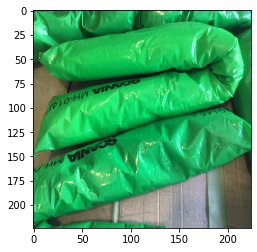

In [19]:
img = X_test[6]
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)[0].argmax()

In [386]:
model.save('models/emptybox.h5')

In [312]:
img = cv.imread('images/boxes/test/6.png', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img.shape
img = cv.resize(img, (224,224))
img = img / 255
plt.imshow(img)
img = img.reshape(-1, INPUT_SIZE[0], INPUT_SIZE[1], INPUT_SIZE[2])
model.predict(img)


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [289]:
X_train.shape

(96, 224, 224, 3)